In [1]:
import matplotlib.pyplot as plt

# Parametric Distributions

In Section [Sound Level Distribution](../stats_random_variables.ipynb) we looked at the empirical distribution of the sound levels dataset through the lens of the histogram. Often (but not always) the distribution's shape can be described by a function with a few parameters, and those parameters can have an interpretable meaning. 

## Normal Distribution

A popular example is the Normal (Gaussian) distribution, which is characterized by the bell curve and its mean and variance. In the context of ocean acoustics, it is often assumed that ambient noise (in the absence of distinct strong noise sources) follows normal distribution, There are many other scenarios in which it is observed, in many cases explained by the Central Limit Theorem (see Section [Limit Theorems]()).

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&confirm=t&id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq' -O background.wav

--2025-03-04 22:58:50--  https://docs.google.com/uc?export=download&confirm=t&id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq
Resolving docs.google.com (docs.google.com)... 142.250.217.78, 2607:f8b0:400a:806::200e
Connecting to docs.google.com (docs.google.com)|142.250.217.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq&export=download [following]
--2025-03-04 22:58:50--  https://drive.usercontent.google.com/download?id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.215.225, 2607:f8b0:400a:80b::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.215.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5759054 (5.5M) [audio/wav]
Saving to: ‘background.wav’

background.wav      100%[===================>]   5.49M  --.-KB/s    in 0.07s   



In [4]:
from scipy.io import wavfile

In [5]:
# reading background data
bg_samplerate, bg_signal = wavfile.read('background.wav')

We will compute the sound level per second:

In [6]:
import numpy as np
# first we split small intervals of 0.1s
bg_signal_split = np.split(bg_signal[:(len(bg_signal)-len(bg_signal)%bg_samplerate)], len(bg_signal[:(len(bg_signal)-len(bg_signal)%bg_samplerate)])/bg_samplerate*10)

In [7]:
# we calculate RMS for each interval
RMS_split = [np.sqrt(np.mean(np.square(group.astype('float')))) for group in bg_signal_split]

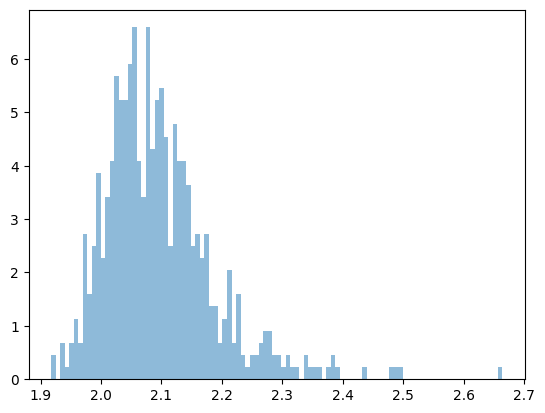

In [8]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)

We observe that the histogram is not a "perfect" bell curve, partially because there are some sounds of waves. Regardless, let's try to see how closely we can describe it with a normal distribution. 


First, we will calculate the mean and the variance of the observations, and we will overlay the normal density curve with those parameters on the histogram.

In [9]:
mean = np.mean(np.log10(RMS_split))
std = np.std(np.log10(RMS_split))

In [10]:
import scipy.stats as stats
gaussian_density = stats.norm.pdf(h[1], loc=mean, scale=std)

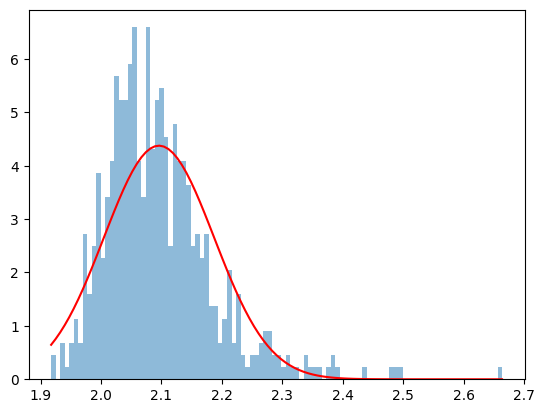

In [11]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')

## Bell Shaped Distributions

The normal distribution is not the only distribution that has a "bell shape". 

### Cauchy Distribution

The Cauchy distribution is popular example of a distribution which at first sight seems to have a "bell shape" similar to that of a normal distribution, however, its tails are "fatter", i.e. events in those tails are more common to occur than events in the tails of the normal distribution. While the normal distribution can be described by its mean and standard deviation, the Cauchy distribution is a pathological example of a distribution without finite expected value and variance. The Cauchy distribution instead can be described by its median and the interquartile range (the range corresponding to the middle 50% of the observations). 

In [12]:
cauchy_density = stats.cauchy.pdf(h[1],np.median(np.log10(RMS_split)), stats.iqr(np.log10(RMS_split))/2)

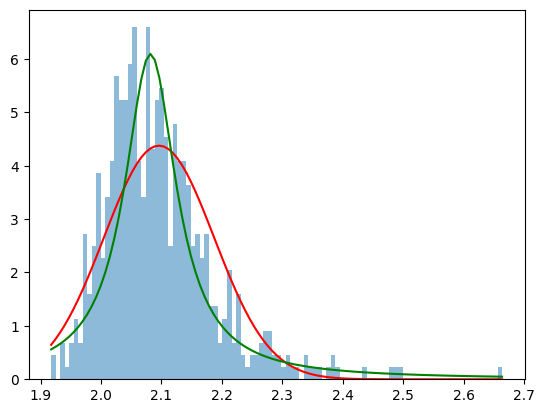

In [13]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')
plt.plot(h[1], cauchy_density, 'g')


We can see that the right-hand-side tail is higher than the tail of the normal distribution and in this case seems to better capture the outliers (which in this case correspond to louder events in comparison to ambient noise).

### Logistic Distribution

Logistic distribution is another example of a distribution with thicker tails, however, it has better properties: its mean and variance are finite. It can be described by its mean and scale $(\sqrt{3}std/\pi )$.

In [14]:
import math
logistic_density = stats.logistic.pdf(h[1], mean, std/math.pi*math.sqrt(3))

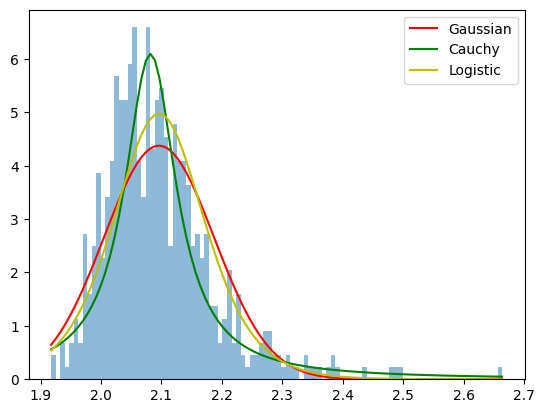

In [15]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')
plt.plot(h[1], cauchy_density, 'g')
plt.plot(h[1], logistic_density, 'y')
plt.legend(["Gaussian", "Cauchy", "Logistic"])

The tails are just slightly higher than the tails of the normal distribution, but it overal captures more of the cental data.

### Laplace Distribution

Yet another example of a symmetric distribution is Laplace. Laplace distribution is characterized by a sharper peak.

In [16]:
laplace_density = stats.laplace.pdf(h[1], loc=mean, scale=std)

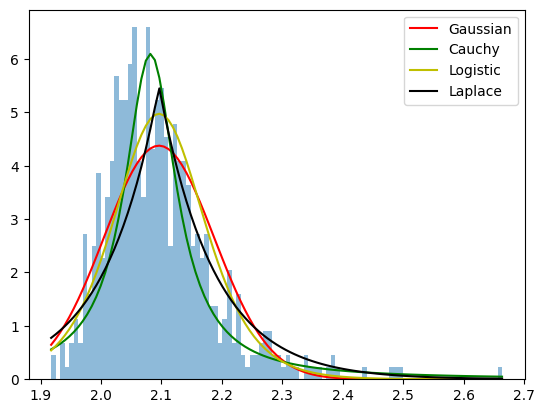

In [17]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')
plt.plot(h[1], cauchy_density, 'g')
plt.plot(h[1], logistic_density, 'y')
plt.plot(h[1], laplace_density, 'k')
plt.legend(["Gaussian", "Cauchy", "Logistic", "Laplace"])

### Gamma Distribution



It is obvious that the distribution of the sound levels is not symmetric. The right tail corresponds to the rare louder events. The left tail has cut-off threshold due to the properies of the hydrophone. We can describe this pattern with Gamma distribution which can have a non-symmetric shape. 



There are several parameters which describe a Gamma distribution: shape, scale, and offset. The shape determines the skewness, and for that we need to estimate the sample skewness from the sample. Once the shape is known the sample mean and standard deviation can be used to estimate the offset and scale.

$\alpha = \frac{4}{skeweness}$

$offset = \mu - \sigma \sqrt{\alpha}$

$scale = \frac{\sigma^2}{\mu - offset}$

In [106]:
# calculate skewness
sk = stats.skew(np.log10(RMS_split), bias=True)

In [109]:
# estimate parameters
a = 4/(sk**2)
offset = mean - std*np.sqrt(a)
scale = std**2/(mean - offset)

In [110]:
gamma_density = stats.gamma.pdf(h[1], a=a, scale=scale, loc=offset)

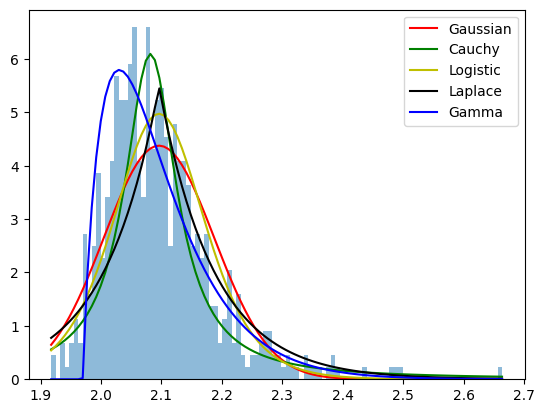

In [111]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')
plt.plot(h[1], cauchy_density, 'g')
plt.plot(h[1], logistic_density, 'y')
plt.plot(h[1], laplace_density, 'k')
plt.plot(h[1], gamma_density, 'b')
plt.legend(["Gaussian", "Cauchy", "Logistic", "Laplace", "Gamma"])

We can see that all these distributions fit the data to some extent but have varying sharpness of the peak, varying thickness of the tails, and varying skewness. We used specific formulas to calculate the parameters based on the sample mean, standard, deviation and skewenees. This approach is very general and it is called the [Method of Moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)). In the future sections we will discuss in more detail how to estimate parameters and how to evaluate the fit.